# 자연어 처리(Natual Language Processing)

- 설치 목록
   - JDK(Java SE Downloads) - Skip
   - JAVA_HOME 설정 - Skip
   - JPype 설치 : 파이썬에서 자바 클래스를 호출해 사용할 수 있게 해줌.
   - KoNLPy 설치
   - Word Cloud 설치

## 한글 자연어 정보 처리 라이브러리 - KoNLPy 및 필요 모듈 설치

### KoNLPy

 - KoNLPy는 자바 기반의 형태소 분석기를 파이썬에서 사용할 수 있게 해주는 라이브러리이다.
 - 국내외에서 개발한 여러 형태소 분석기를 포함하고 있으며 자연어처리에 필요한 사전, 말뭉치, 도구 등을  
   포함하여 손쉽게 한국어 분석을 할 수 있게 도와준다.
 - 파이썬으로 한글 자연어를 처리하기 위해서는 java기반으로 만들어진 형태소 분석기를 사용한다.
 - KoNLPy가 지원하는 형태소 분석기는 총 5가지가 존재한다.(형태소 토크나이징)
     - hannanum(한나눔)
     - kkma(꼬꼬마)
     - komoran(코모란)
     - twitter(트위터)
     - mecab(메캅) - 이 친구는 윈도우에서 사용 불가

## 한글 자연어 처리 기초

In [2]:
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
# 형태소 분석기 호출
# 마침표가 없어도 문장을 나눠서 추출
kkma.sentences('한국어 분석을 시작합니다. 재미있어요~~')

['한국어 분석을 시작합니다.']

In [4]:
# 명사 추출
kkma.nouns('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석']

In [5]:
# 형태소 분석
# 한글은 영어와 달리 단어의 형태 변화가 많아서 영어처럼 쉽게 접근하기 어렵다.
# 그래서 최소한의 의미 단위인 형태소로 언어를 분석하는 것이 일반적임.

kkma.pos('한국어 분석을 시작합니다. 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

 - 다른 형태소 분석기 한나눔 사용

In [7]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [8]:
# 꼬꼬마 엔진과는 약간 다른 결과
hannanum.nouns('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석', '시작']

In [9]:
# 한나눔의 형태소 분석 결롸
hannanum.morphs('한국어 분석을 시작합니다. 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '.', '재미있', '어요', '~~']

In [10]:
hannanum.pos('한국어 분석을 시작합니다. 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('.', 'S'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

 - 트위터 분석

In [11]:
from konlpy.tag import Okt
t = Okt()

In [13]:
# 정규화 : 어지럽힌 문장을 제대로 분석할 수 있도록 다듬어줌.
text = '안녕하세용 ㅋㅋㅋ 반가워요 샤릉해~ㅎ'
t.normalize(text)

'안녕하세요 ㅋㅋㅋ 반가워요 사랑해~ㅎ'

In [14]:
# 명사데이터를 리스트 형태로 반환
text = '한국어 분석을 시작합니다. 재미있어요~'
t.nouns(text)

['한국어', '분석', '시작']

In [16]:
# 어간 분석
text = '''한국 증시는 10월24일 일제히 반등에 성공해, 살짝 오른 틈을 이용해서
기관투자가와 공매도들은 일제히 언론 플레이를 하고 개미들은 이제 저점인것으로 착각하고 다시 불속으로 뛰어드는데......'''
t.phrases(text)

['한국',
 '한국 증시',
 '10월24일',
 '10월24일 일제',
 '반등',
 '살짝',
 '살짝 오른',
 '살짝 오른 틈',
 '이용',
 '기관투자가',
 '기관투자가와 공매도들',
 '일제',
 '언론',
 '언론 플레이',
 '개미들',
 '이제',
 '이제 저점',
 '착각',
 '다시',
 '다시 불속',
 '증시',
 '오른',
 '기관',
 '투자가',
 '공매도들',
 '플레이',
 '저점',
 '불속']

In [17]:
# morphs : 형태소 분석, 품사가 없는 것이 단점
'''
형태소 기반으로 리스트 형식으로 리턴해주는데 태그가 없기 때문에 어떤 형태소가 어떤 품사인지 알수 없음
'''

text = '한국어 분석을 시작합니다 재미있어요~~'
t.morphs(text)

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [18]:
text = '''이육사, 한국의 민족저항 시인으로 일제 식민지하의 민족적 
비운을 소재로 삼아 강렬한 저항의지를 나타내고, 꺼지지 않는 민족정신을 장엄하게 노해한 것이 특징이다.'''

t.pos(text)
t.pos(text, join = True)

['이육사/Noun',
 ',/Punctuation',
 '한국/Noun',
 '의/Josa',
 '민족/Noun',
 '저항/Noun',
 '시인/Noun',
 '으로/Josa',
 '일제/Noun',
 '식민지/Noun',
 '하의/Noun',
 '민족/Noun',
 '적/Suffix',
 '비운/Noun',
 '을/Josa',
 '소재/Noun',
 '로/Josa',
 '삼아/Verb',
 '강렬한/Adjective',
 '저항/Noun',
 '의지/Noun',
 '를/Josa',
 '나타내고/Verb',
 ',/Punctuation',
 '꺼지지/Verb',
 '않는/Verb',
 '민족/Noun',
 '정신/Noun',
 '을/Josa',
 '장엄하게/Adjective',
 '노해/Noun',
 '한/Josa',
 '것/Noun',
 '이/Josa',
 '특징/Noun',
 '이다/Josa',
 './Punctuation']

## 워드 클라우드

* 자주 언급되는 단어를 크게 보여줌으로서 직관적으로 텍스트를 알리는 데 도움을 준다.
* 자료의 빈도를 시각적으로 나타내는 시각화 방법 중 하나

In [19]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np

# pillow : 파이썬에서 이미지 분석 및 처리를 쉽게 할 수 있는 이미지 프로세싱 라이브러리
from PIL import Image

 - 이상한 나라의 앨리스 영문 버전을 다운 받아서 data 폴더에 저징
 - 앨리스 그림도 저장

In [21]:
# 텍스트 문서 읽어오기
text = open('./data/alice.txt').read()

# 엘리스 이미지 읽어오기
alice_mask = np.array(Image.open('./data/alice_mask.png'))

# 연관도가 떨어지는 단어 제외
stopwords = set(STOPWORDS)
stopwords.add('said')

In [22]:
import matplotlib.pyplot as plt

# 한글폰트 설정
plt.rc('font', family='AppleGothic')

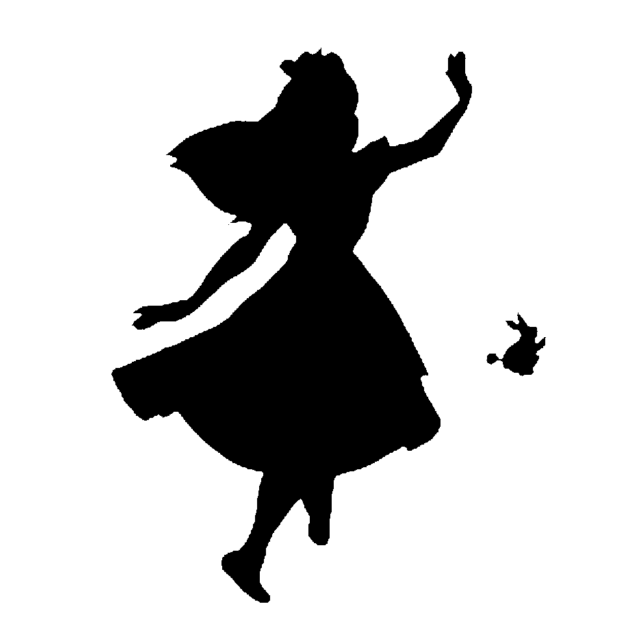

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

 - 워드 클라우드가 문서 자체에서 단어를 카운트하는 기능을 제공하니 그것을 사용해서 최빈 단어를 찾는다.

In [24]:
# max_words : 워드클라우드에 넣을 최대 글자수
# stopwords : 제외할 단어
wc = WordCloud(background_color= 'white',
               max_words=2000,
               mask=alice_mask,
               stopwords=stopwords)

wc = wc.generate(text)

wc.words_ # 처리 결과를 딕셔너리 형태로 반환

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

 - 처리 결과 Alice 단어가 가장 많이 등장하였다.
 - 이제 위에 코드 결과를 엘리스 그림에 겹쳐 보이게 하면됨.

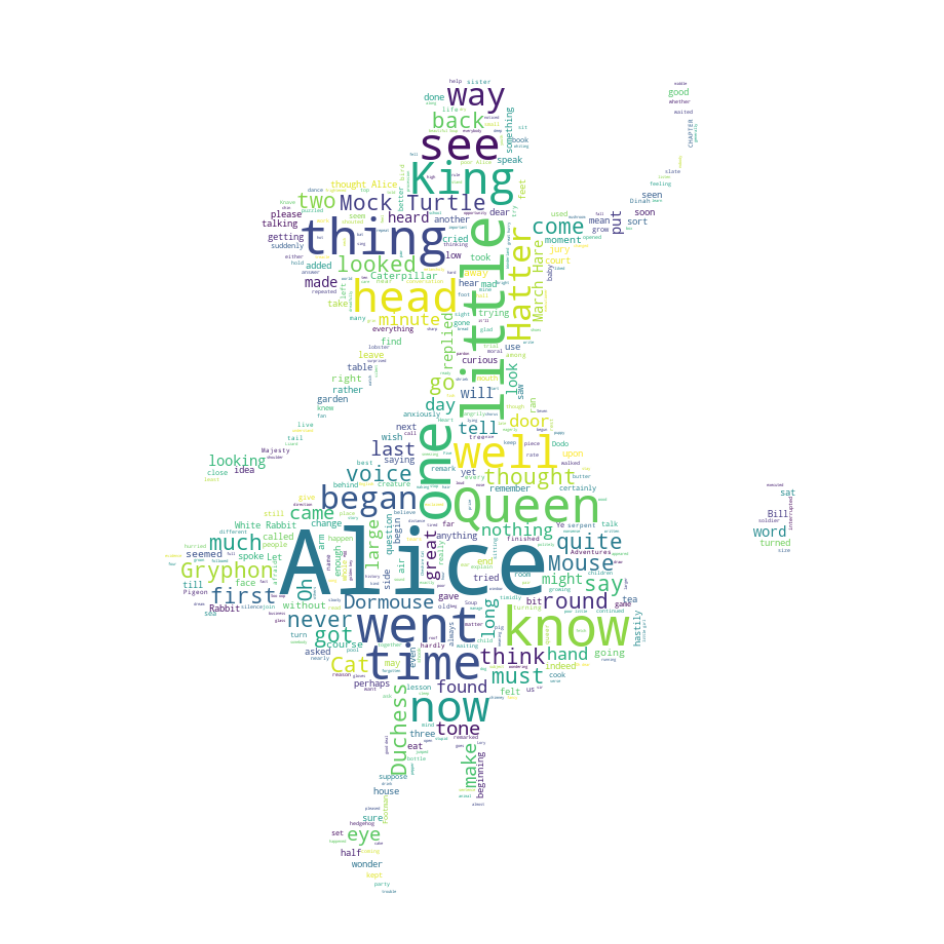

In [25]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear') # interpolation : 이미지 형태 지정
plt.axis('off')
plt.show()

 -  다음은 스타워즈의 A New Hope 텍스트이다.

In [26]:
text = open('./data/a_new_hope.txt').read()

text = text.replace('HAN', 'han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./data/stormtrooper_mask.png'))

 - 특수하게 처리해야 할 던어를 처리하자

In [27]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

 - 워드 클라우드를 준비

In [28]:
# mask : 배경이미지
wc = WordCloud(max_words=1000,
               mask=mask,
               stopwords=stopwords,
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

 - 앨리스와는 약간 달리 색상을 저네적으로 회색으로 채우는 함수를 작성

In [29]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)

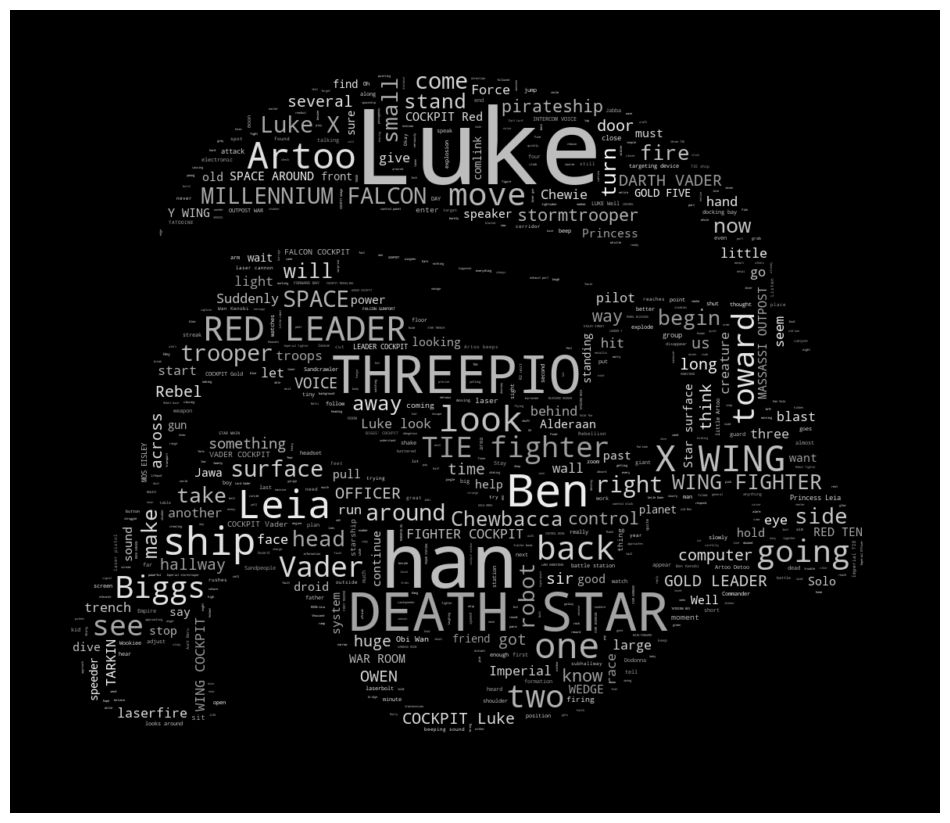

In [31]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation='bilinear')
plt.axis('off')
plt.show()

 - 판다스의 데이터프레임으로 워드클라우드

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [33]:
filePath = './data/fruit_vegetable.csv'
df = pd.read_csv(filePath, encoding='utf-8')
wc = df.set_index('title').to_dict()['count']

wordCloud = WordCloud(
font_path='AppleGothic',
width = 400,
height= 400,
max_font_size= 100,
background_color= 'white'
).generate_from_frequencies(wc)

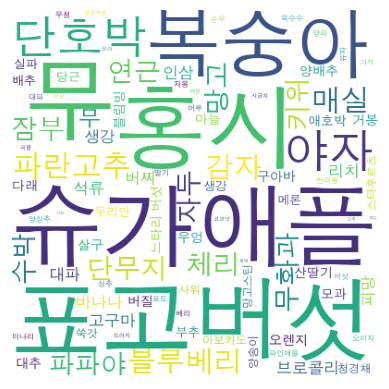

In [34]:
plt.figure()
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

# NLTK(Natural Language Toolkit) 패키지

### 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지 다양한 기능 및 예제를 
### 가지고 있으며 실무 및 연구에서도 많이 사용된다.

 - NLTK 패키지가 제공하는 주요 기능은 다음과 같다.
    - 말뭉치
    - 토큰 생성
    - 형태소 분석
    - 품사 태깅

## 1. 말뭉치
 - 말뭉치는 자연어 분석 작업을 위해 만든 샘플 문서 집합을 말한다.
 - 소설, 신문 등의 문서 그리고 품사, 형태소 등의 보조적 의미를 추가하고 쉬운 분석을 위헤
   구조적인 형태로 정리해 놓음
 - NLTK 패키지의 말뭉치 서브 패키지에서는 다양한 영구용 말뭉치를 제공한다.  
   이 목록은 전체 말뭉치의 일부이며 말뭉치 자료는 설치시에 제공되지 않고  
   다운로드 명령을 통해 사용자가 다운받아야 한다.
 - nltk.download('book')명령을 실행하면 nltk 패키지 사용자 설명서에서 요구하는 대부분의 말뭉치를 다운로드 받아준다.

## 2. 토큰 생성
 - 자연어 문서를 분석하기 위해서는 우선 긴 문자열을 분석을 위한 작은 단위로 나누어야 한다.
 - 이 문자열 단위를 토큰이라고 하고 이렇게 문자열을 토큰으로 나누는 작업을 토큰 생성이라고 한다.
 - 문자열을 토큰으로 분리하는 함수를 토큰 생성 함수라고 한다.
 - 토큰 생성 함수는 문자열을 입력받아 토큰 문자열의 리스트를 출력한다.
 

## 3. 형태소 분석
 - 형태소는 의미가 있는 가장 작은 말의 단위 보통 자연어 처리에서는 토큰으로 형태소를 이용한다.  
   형태소 분석이란 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고  
   이를 이용하여 형태소를 탖아내거나 처리하는 작업이다. 형태소 분석의 예로는 다음과 같은 작업이 있다.
      - 어간 추출
      - 원형 복원
      - 품사 부착

## 4. Text 클래스
 - 문서 분석에 유용한 여러가지 메소드를 제공한다. 토큰열을 입력하여 생성한다.
 - plot 메소드를 사용하면 각 토큰의 사용 빈도를 그래프로 그려준다.

# 육아 휴직 관련 법안 대한민국 국회 제 1809890호

In [35]:
import nltk

 - 먼저 nltk를 임포트하고 KoNLPy의 내부 문서 중 육아휴직 관현 법안 제 1809890호를 읽는다.

In [42]:
from konlpy.corpus import kobill # 국회법안 말뭉치인 kobill

files_ko = kobill.fileids() # 말뭉치가 포함하는 법안 리스트 조회
doc_ko = kobill.open('1809890.txt').read() # 해당 파일 오픈

In [40]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

 - 이 문서를 Twitter 분석기로 명사 분석

In [43]:
from konlpy.tag import Okt

t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [44]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')
ko

<Text: 대한민국 국회 의안 제 1809890호>

 - 수집된 단어의 횟수와 고유한 횟수를 확인한다.

In [45]:
print(len(ko.tokens)) # 토큰 수 반환
print(len(set(ko.tokens))) # 유일 토큰 수 반환
ko.vocab() # 빈도 분포 반환

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

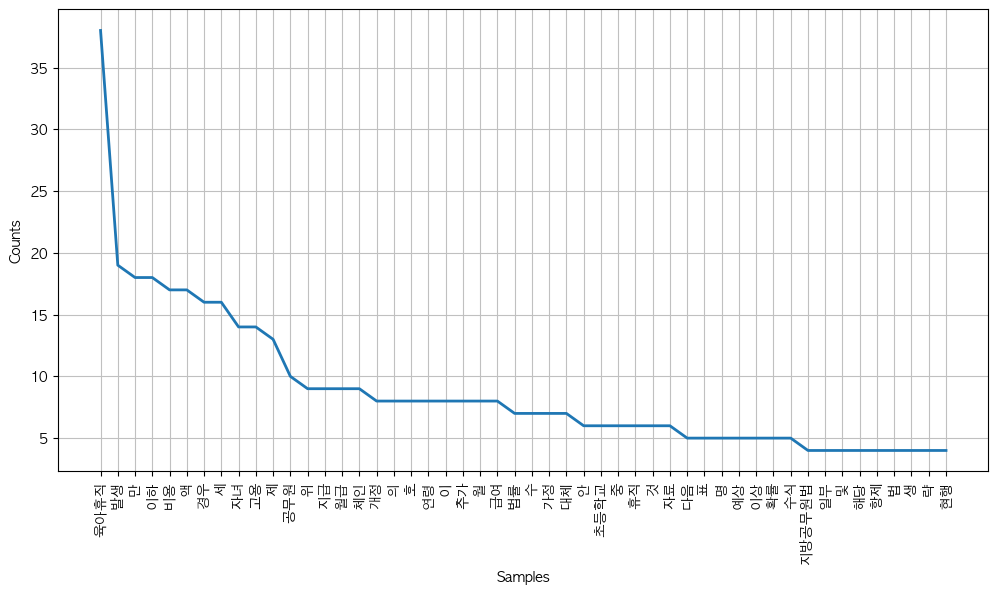

In [48]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

 - 많이 등장한 순으로 plot 해볼 수 있다. 당연하겠지만 '육아휴직'이하는 단어가 가장 많이 나온다.
 - 그런데 약간 의미 없는 단어도 보인다. 한글은 영어와 달리 stopword를 지정하기 쉽지 않다.
 - 그래서 case-by-case로 지정해야 함.

In [49]:
# 불용어 처리
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

# 반복문으로 돌려서 불용어 모두 제거
ko = [each_word for each_word in ko if each_word not in stop_words]
ko # 최종 결과는 리스트로 반환 됨

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

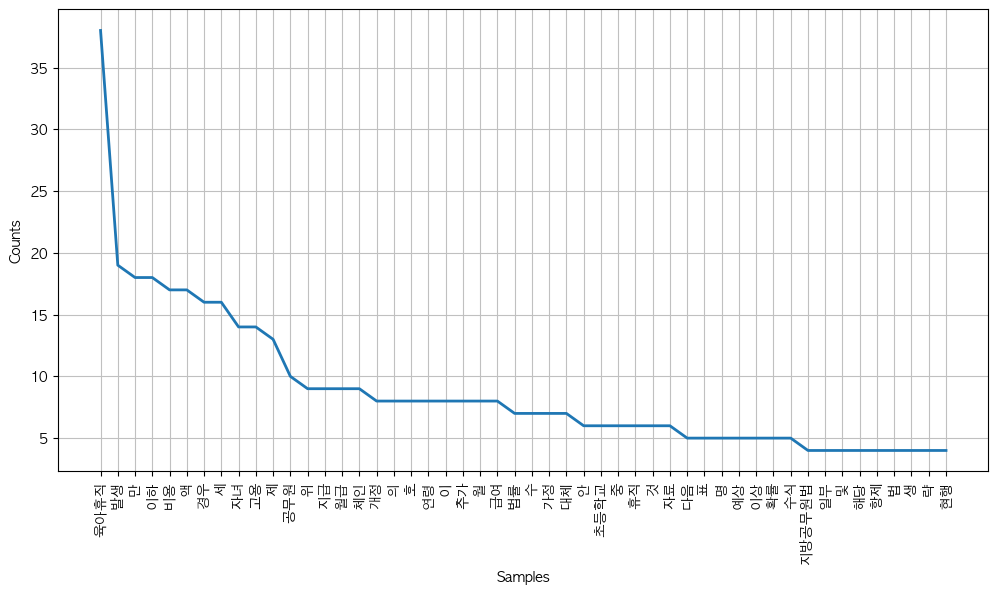

In [51]:
# 불용어 제거 후 다시 분석하여 그래프로 확인
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50) # 상위 50개만 출력
plt.show()

 - 이제 조금 개션됨, 좀더 stop_words 변수에 의미 없어 보이는 단어를 추가해야함.
 
 - 어떤 단어가 문서 내에서 몇 번 언급되었는지 확인할 수 있다.

In [52]:
ko.count('초등학교')

6

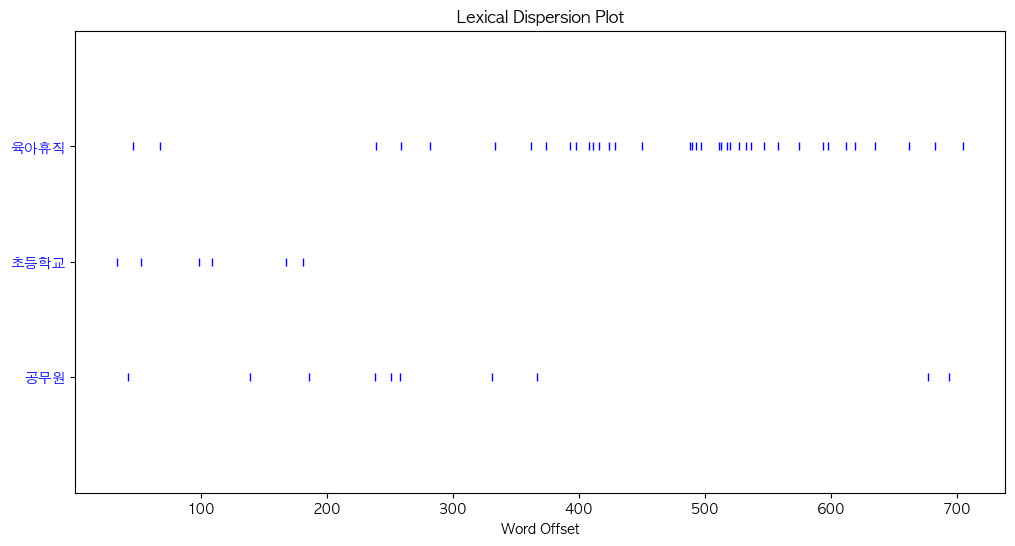

In [53]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

 - 원하는 단어의 문서 내 위치를 개략적으로 그 분량과 함께 알 수 있음.

In [54]:
# 인자로 전달된 문자의 앞뒤에 어떤 문자가 있는지 확인
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 만 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
법률 안 지방공무원법 일부 다음 개정 제 항제 호 중 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말
 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말 의 자녀 로 부 칙 이 법 공포 날 시행 신 구조 
제 호 의 경우 대통령령 정 사정 직 명 생 략 현행 만 세 이하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학
하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 의 자녀 임신 출산 때 생 략 생 


 - 앞 절에서 학습한 워드 클라우드를 적용해보자

In [58]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='AppleGothic',
                      relative_scaling= 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))

 - 워드 클라우드 시각화

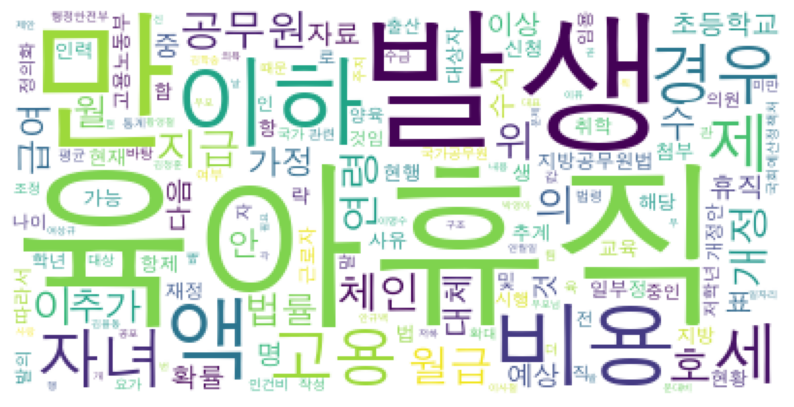

In [60]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()